In [28]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cmocean as cmo
import seaborn as sb

def mask_composite(ds, var, start_year=0, min_lat=-90, max_lat=90, min_lon=-180, max_lon=360):
    X = np.meshgrid(ds.x.data,ds.y.data)
    mask = xr.DataArray(np.sqrt(X[0]**2 + X[1]**2) <= 10, dims=['x', 'y'])
    
    idx_region = (ds.snap_time.dt.year > start_year) & (ds.snap_lat >= min_lat) & (ds.snap_lat <= max_lat) & \
    (ds.snap_lon >= min_lon) & (ds.snap_lon <= max_lon)
    
    test = ds[var][idx_region,:,:]
    test = xr.where(abs(test)>1e10, np.nan, test)
    test = xr.where(test==0, np.nan, test)

    out_masked = xr.where(mask, test, np.nan)
    return out_masked

In [29]:
experiment = ["CM4", "ESM4"]
var = ["hfds", "dic_stf_gas"]
path = {"CM4": "/work/Katherine.Turner/tempest-extremes/odiv-251/comp_",
        "ESM4": "/work/Katherine.Turner/tempest-extremes/ESM4/"}
lim = {"hfds": 45,
      "dic_stf_gas": 3e-8}

In [44]:
exp = experiment[0]
v = var[1]

f = f"{path[exp]}{v}/comp_{v}_anom_static.nc"
print(f)

ds = xr.open_dataset(f, use_cftime=True)

v_masked = mask_composite(ds, f"snap_{v}_anom")

/work/Katherine.Turner/tempest-extremes/odiv-251/comp_dic_stf_gas/comp_dic_stf_gas_anom_static.nc


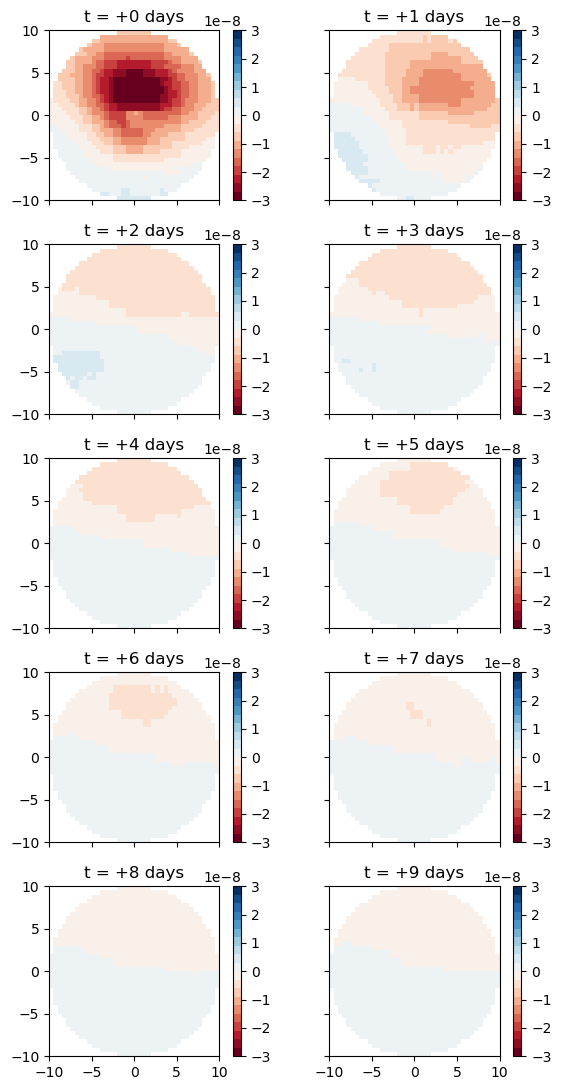

In [39]:
fig, axs = plt.subplots(nrows=5,ncols=2, figsize = (6,11), sharex=True, sharey=True)
axs=axs.flatten()

for i in np.arange(10):
    comp = v_masked[:,:,i::11].mean(dim="snapshot",skipna=True)
    comp.plot(ax=axs[i], y='y', vmin=-1*lim[v], vmax=lim[v], extend="neither", cmap=plt.get_cmap("RdBu", 20))
    axs[i].set_xlabel("")
    axs[i].set_ylabel("")
    axs[i].set_title(f"t = +{i} days")
    axs[i].set_box_aspect(1)
    
plt.tight_layout()

plt.savefig(f"/home/Katherine.Turner/Figures/tempest-extremes/{exp}_{v}_delayed_10day.png", format="png", dpi=100)

In [63]:
x = carb_masked[20,30,0::11].mean(dim="snapshot",skipna=True)
s = carb_masked[20,30,0::11].std(dim="snapshot",skipna=True)

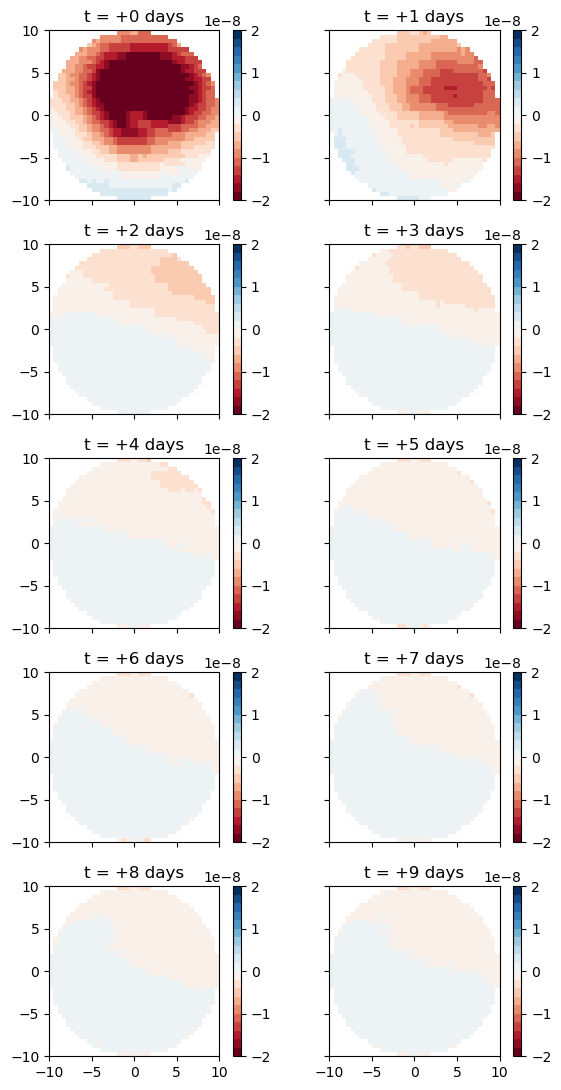

In [15]:
fig, axs = plt.subplots(nrows=5,ncols=2, figsize = (6,11), sharex=True, sharey=True)
axs=axs.flatten()

for i in np.arange(10):
    comp = carb_masked[:,:,i::11].mean(dim="snapshot",skipna=True)
    comp.plot(ax=axs[i], y='y', vmin=-2e-8, vmax=2e-8, extend="neither", cmap=plt.get_cmap("RdBu", 20))
    axs[i].set_xlabel("")
    axs[i].set_ylabel("")
    axs[i].set_title(f"t = +{i} days")
    axs[i].set_box_aspect(1)
    
plt.tight_layout()

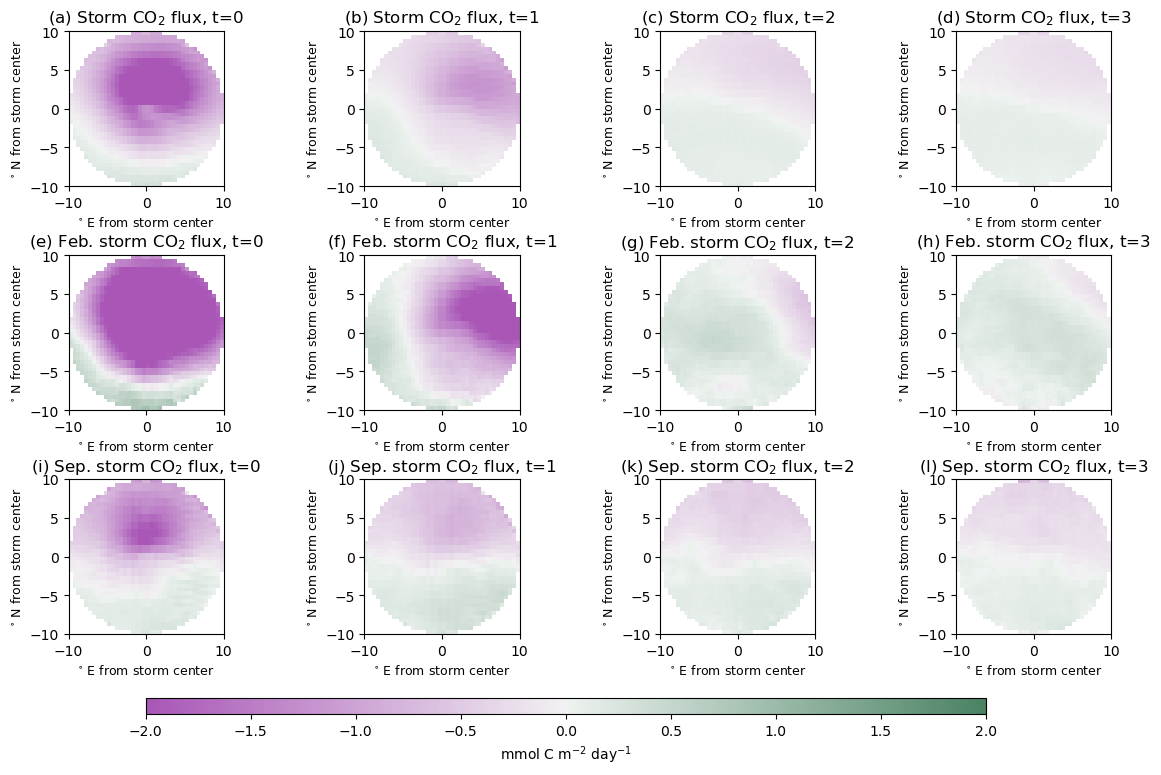

In [45]:
idx_time = np.arange(ds.snap_time.shape[0])

nl='\n'
head1 = ['a', 'b', 'c', 'd']
head2 = ['e', 'f', 'g', 'h']
head3 = ['i', 'j', 'k', 'l']

fig, axs = plt.subplots(nrows=3,ncols=4, figsize = (12,8))
axs=axs.flatten()

for i in np.arange(4):
    
    idx = (idx_time % 11 == i)
    
    comp = (1e3* 60**2 * 24 *v_masked[:,:,idx]).mean(dim="snapshot",skipna=True)
    comp.plot(ax=axs[i], y='y', vmin=-2, vmax=2, extend="neither", cmap=sb.diverging_palette(300, 145, s=60, as_cmap=True),
             add_colorbar=False)
    axs[i].set_title(f"({head1[i]}) Storm CO$_2$ flux, t={i}")

for i in np.arange(4):
    
    idx = (ds.snap_time.dt.month == 2) & (idx_time % 11 == i)
    
    comp = (1e3* 60**2 * 24 *v_masked[:,:,idx]).mean(dim="snapshot",skipna=True)
    comp.plot(ax=axs[i+4], y='y', vmin=-2, vmax=2, extend="neither", cmap=sb.diverging_palette(300, 145, s=60, as_cmap=True),
             add_colorbar=False)
    axs[i+4].set_title(f"({head2[i]}) Feb. storm CO$_2$ flux, t={i}")
    
for i in np.arange(4):
    
    idx = (ds.snap_time.dt.month == 9) & (idx_time % 11 == i)
    
    comp = (1e3* 60**2 * 24 *v_masked[:,:,idx]).mean(dim="snapshot",skipna=True)
    im = comp.plot(ax=axs[i+8], y='y', vmin=-2, vmax=2, extend="neither", cmap=sb.diverging_palette(300, 145, s=60, as_cmap=True),
             add_colorbar=False)
    axs[i+8].set_title(f"({head3[i]}) Sep. storm CO$_2$ flux, t={i}")
    
for i in np.arange(12):
    axs[i].set_box_aspect(1)
    axs[i].set_xlabel('$^{\circ}$ E from storm center', fontsize=9)
    axs[i].set_ylabel('$^{\circ}$ N from storm center', fontsize=9)

plt.tight_layout()
fig.subplots_adjust(bottom=0.2)
cbar_ax = fig.add_axes([0.15, 0.10, 0.7, 0.02])
fig.colorbar(im, cax=cbar_ax, orientation="horizontal",
            label='mmol C m$^{-2}$ day$^{-1}$')

#plt.savefig("/home/Katherine.Turner/Figures/tempest-extremes/f_dic_delayed.eps", format="eps", dpi=100, bbox_inches="tight")
plt.savefig(f"/home/Katherine.Turner/Figures/tempest-extremes/{exp}_{v}_delayed_4day_seasonal.png", format="png", dpi=100)

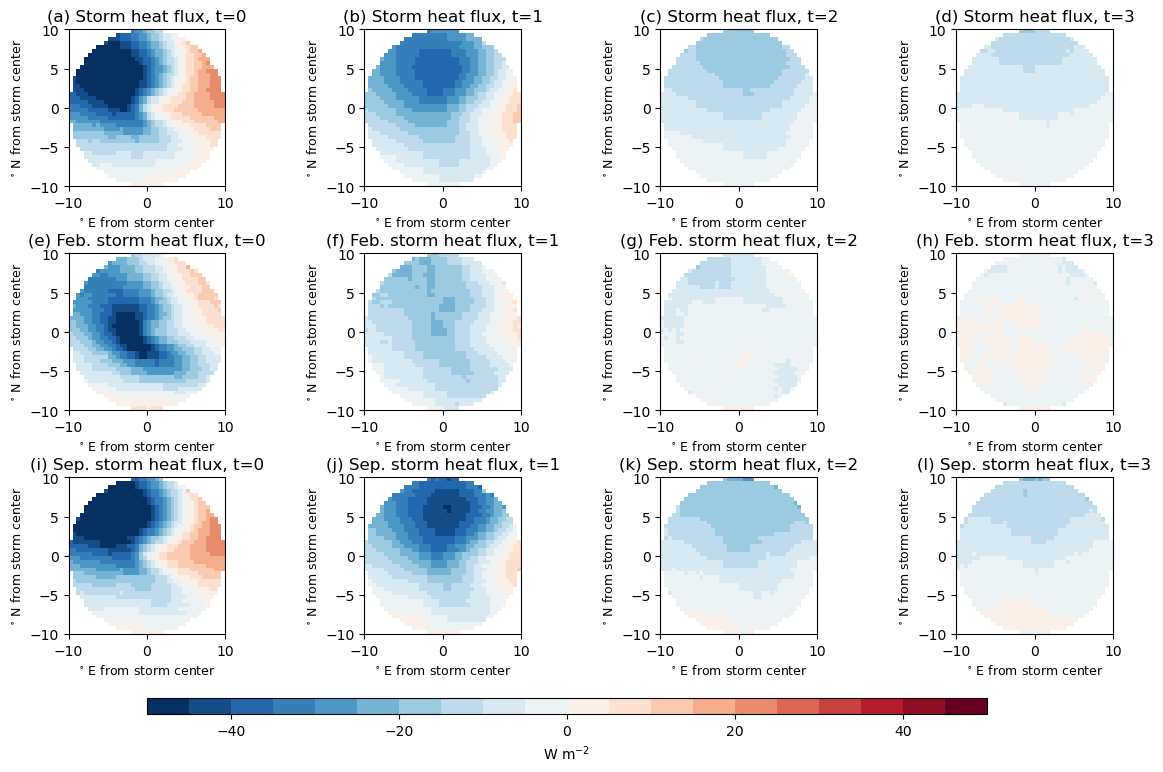

In [7]:
idx_hfds = np.arange(ds_hfds.snap_time.shape[0])

fig, axs = plt.subplots(nrows=3,ncols=4, figsize = (12,8))
axs=axs.flatten()

for i in np.arange(4):
    
    idx = (idx_hfds % 11 == i)
    
    comp = hfds_masked[:,:,idx].mean(dim="snapshot",skipna=True)
    comp.plot(ax=axs[i], y='y', vmin=-50, vmax=50, extend="neither", cmap=plt.get_cmap("RdBu_r", 20),
             add_colorbar=False)
    axs[i].set_title(f"({head1[i]}) Storm heat flux, t={i}")

for i in np.arange(4):
    
    idx = (ds_hfds.snap_time.dt.month == 2) & (idx_hfds % 11 == i)
    
    comp = hfds_masked[:,:,idx].mean(dim="snapshot",skipna=True)
    comp.plot(ax=axs[i+4], y='y', vmin=-50, vmax=50, extend="neither", cmap=plt.get_cmap("RdBu_r", 20),
             add_colorbar=False)
    axs[i+4].set_title(f"({head2[i]}) Feb. storm heat flux, t={i}")
    
for i in np.arange(4):
    
    idx = (ds_hfds.snap_time.dt.month == 9) & (idx_hfds % 11 == i)
    
    comp = hfds_masked[:,:,idx].mean(dim="snapshot",skipna=True)
    im = comp.plot(ax=axs[i+8], y='y', vmin=-50, vmax=50, extend="neither", cmap=plt.get_cmap("RdBu_r", 20),
             add_colorbar=False)
    axs[i+8].set_title(f"({head3[i]}) Sep. storm heat flux, t={i}")

for i in np.arange(12):
    axs[i].set_box_aspect(1)
    axs[i].set_xlabel('$^{\circ}$ E from storm center', fontsize=9)
    axs[i].set_ylabel('$^{\circ}$ N from storm center', fontsize=9)

plt.tight_layout()
fig.subplots_adjust(bottom=0.2)
cbar_ax = fig.add_axes([0.15, 0.10, 0.7, 0.02])
fig.colorbar(im, cax=cbar_ax, orientation="horizontal",
            label='W m$^{-2}$')
    

plt.savefig("/home/Katherine.Turner/hfds_delayed.eps", format="eps", bbox_inches="tight")
plt.savefig("/home/Katherine.Turner/hfds_delayed.png", format="png", dpi=100, bbox_inches="tight")

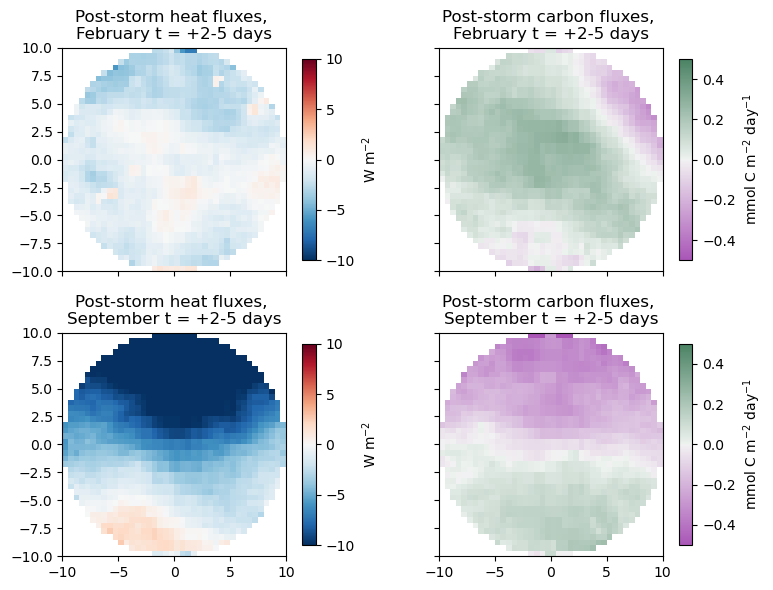

In [8]:
ndays = 5

fig, axs = plt.subplots(nrows=2,ncols=2, figsize = (8,6), sharex=True, sharey=True)
axs=axs.flatten()

idx1 = (ds_hfds.snap_time.dt.month == 2) & (idx_hfds % 11 > 1) & (idx_hfds % 11 <= ndays)    
idx2 = (ds_carb.snap_time.dt.month == 2) & (idx_carb % 11 > 1) & (idx_carb % 11 <= ndays)
    
(hfds_masked[:,:,idx1]).mean(dim="snapshot",skipna=True).plot(ax=axs[0], y='y', 
                                                            vmin=-10, vmax=10, extend="neither", 
                                                            cmap="RdBu_r",
                                                            cbar_kwargs={"aspect":15, "shrink":0.9, "label":"W m$^{-2}$"})

(1e3*24*60**2*carb_masked[:,:,idx2]).mean(dim="snapshot",skipna=True).plot(ax=axs[1], y='y', 
                                                            vmin=-0.5, vmax=0.5, extend="neither", 
                                                            cmap=sb.diverging_palette(300, 145, s=60, as_cmap=True),
                                                            cbar_kwargs={"aspect":15, "shrink":0.9, "label":"mmol C m$^{-2}$ day$^{-1}$"})

idx3 = (ds_hfds.snap_time.dt.month == 9) & (idx_hfds % 11 > 1) & (idx_hfds % 11 <= ndays)    
idx4 = (ds_carb.snap_time.dt.month == 9) & (idx_carb % 11 > 1) & (idx_carb % 11 <= ndays)
    
(hfds_masked[:,:,idx3]).mean(dim="snapshot",skipna=True).plot(ax=axs[2], y='y', 
                                                            vmin=-10, vmax=10, extend="neither", 
                                                            cmap="RdBu_r",
                                                            cbar_kwargs={"aspect":15, "shrink":0.9, "label":"W m$^{-2}$"})

(1e3*24*60**2*carb_masked[:,:,idx4]).mean(dim="snapshot",skipna=True).plot(ax=axs[3], y='y', 
                                                            vmin=-.5, vmax=.5, extend="neither", 
                                                            cmap=sb.diverging_palette(300, 145, s=60, as_cmap=True),
                                                            cbar_kwargs={"aspect":15, "shrink":0.9, "label":"mmol C m$^{-2}$ day$^{-1}$"})

for i in np.arange(4):
    axs[i].set_xlabel("")
    axs[i].set_ylabel("")
    
    if i < 2:
        month = "February"
    else:
        month = "September"
    
    if i % 2 == 0:
        axs[i].set_title(f"Post-storm heat fluxes, \n{month} t = +2-{ndays} days")
    if i % 2 == 1:
        axs[i].set_title(f"Post-storm carbon fluxes, \n{month} t = +2-{ndays} days")
    axs[i].set_box_aspect(1)
    
plt.tight_layout()

plt.savefig("/home/Katherine.Turner/Figures/tempest-extremes/composite_fluxes/post_storm_fluxes.png", format="png", dpi=100)

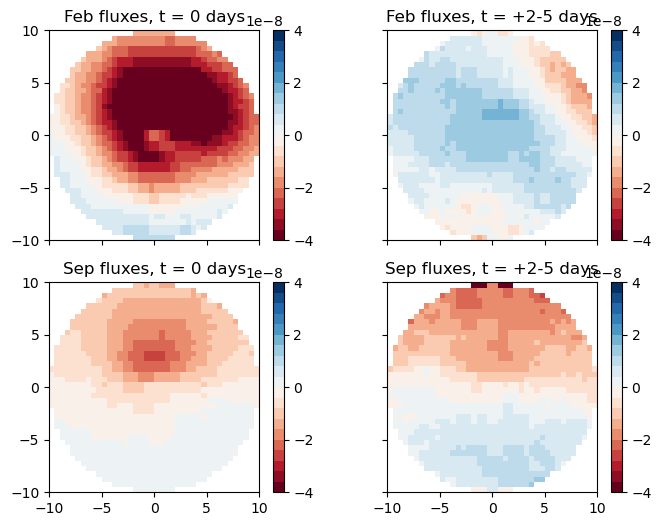

In [6]:
ndays = 5

fig, axs = plt.subplots(nrows=2,ncols=2, figsize = (8,6), sharex=True, sharey=True)
axs=axs.flatten()

    
idx1 = (ds_carb.snap_time.dt.month == 2) & (idx_carb % 11 == 0)
idx2 = (ds_carb.snap_time.dt.month == 2) & (idx_carb % 11 > 1) & (idx_carb % 11 <= ndays)
    
carb_masked[:,:,idx1].mean(dim="snapshot",skipna=True).plot(ax=axs[0], y='y', 
                                                            vmin=-4e-8, vmax=4e-8, extend="neither", 
                                                            cmap=plt.get_cmap("RdBu", 20))

(ndays*carb_masked[:,:,idx2]).mean(dim="snapshot",skipna=True).plot(ax=axs[1], y='y', 
                                                            vmin=-4e-8, vmax=4e-8, extend="neither", 
                                                            cmap=plt.get_cmap("RdBu", 20))

idx3 = (ds_carb.snap_time.dt.month == 9) & (idx_carb % 11 == 0)
idx4 = (ds_carb.snap_time.dt.month == 9) & (idx_carb % 11 > 1) & (idx_carb % 11 <= ndays)
    
carb_masked[:,:,idx3].mean(dim="snapshot",skipna=True).plot(ax=axs[2], y='y', 
                                                            vmin=-4e-8, vmax=4e-8, extend="neither", 
                                                            cmap=plt.get_cmap("RdBu", 20))

(ndays*carb_masked[:,:,idx4]).mean(dim="snapshot",skipna=True).plot(ax=axs[3], y='y', 
                                                            vmin=-4e-8, vmax=4e-8, extend="neither", 
                                                            cmap=plt.get_cmap("RdBu", 20))

for i in np.arange(4):
    axs[i].set_xlabel("")
    axs[i].set_ylabel("")
    
    if i < 2:
        month = "Feb"
    else:
        month = "Sep"
    
    if i % 2 == 0:
        axs[i].set_title(f"{month} fluxes, t = 0 days")
    if i % 2 == 1:
        axs[i].set_title(f"{month} fluxes, t = +2-{ndays} days")
    axs[i].set_box_aspect(1)

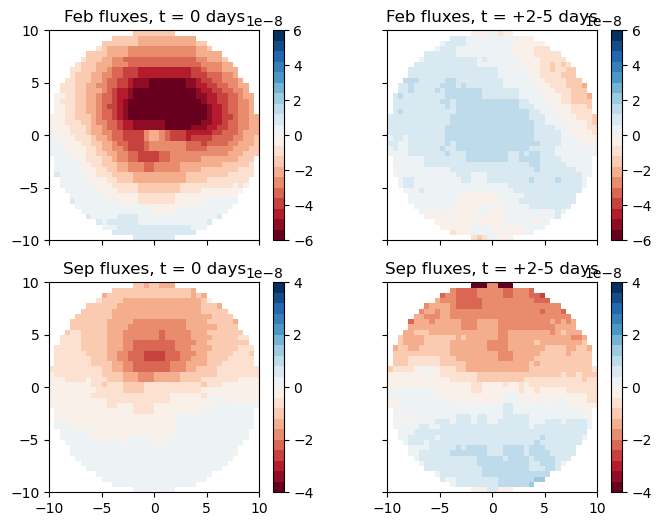

In [11]:
ndays = 5

fig, axs = plt.subplots(nrows=2,ncols=2, figsize = (8,6), sharex=True, sharey=True)
axs=axs.flatten()

    
idx1 = (ds_carb.snap_time.dt.month == 2) & (idx_carb % 11 == 0)
idx2 = (ds_carb.snap_time.dt.month == 2) & (idx_carb % 11 > 1) & (idx_carb % 11 <= ndays)
    
carb_masked[:,:,idx1].mean(dim="snapshot",skipna=True).plot(ax=axs[0], y='y', 
                                                            vmin=-6e-8, vmax=6e-8, extend="neither", 
                                                            cmap=plt.get_cmap("RdBu", 20))

(ndays*carb_masked[:,:,idx2]).mean(dim="snapshot",skipna=True).plot(ax=axs[1], y='y', 
                                                            vmin=-6e-8, vmax=6e-8, extend="neither", 
                                                            cmap=plt.get_cmap("RdBu", 20))

idx3 = (ds_carb.snap_time.dt.month == 9) & (idx_carb % 11 == 0)
idx4 = (ds_carb.snap_time.dt.month == 9) & (idx_carb % 11 > 1) & (idx_carb % 11 <= ndays)
    
carb_masked[:,:,idx3].mean(dim="snapshot",skipna=True).plot(ax=axs[2], y='y', 
                                                            vmin=-4e-8, vmax=4e-8, extend="neither", 
                                                            cmap=plt.get_cmap("RdBu", 20))

(ndays*carb_masked[:,:,idx4]).mean(dim="snapshot",skipna=True).plot(ax=axs[3], y='y', 
                                                            vmin=-4e-8, vmax=4e-8, extend="neither", 
                                                            cmap=plt.get_cmap("RdBu", 20))

for i in np.arange(4):
    axs[i].set_xlabel("")
    axs[i].set_ylabel("")
    
    if i < 2:
        month = "Feb"
    else:
        month = "Sep"
    
    if i % 2 == 0:
        axs[i].set_title(f"{month} fluxes, t = 0 days")
    if i % 2 == 1:
        axs[i].set_title(f"{month} fluxes, t = +2-{ndays} days")
    axs[i].set_box_aspect(1)
    
plt.savefig("/home/Katherine.Turner/fdic_inst_v_delayed.png", format="png", dpi=100, bbox_inches="tight")

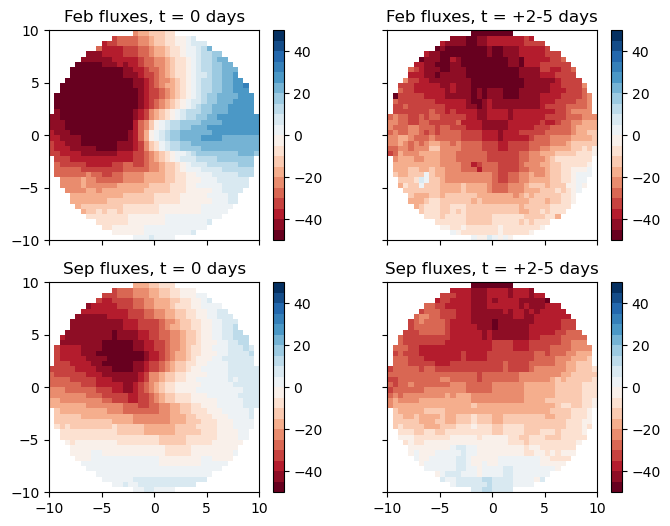

In [10]:
ndays = 5
lim = 50

fig, axs = plt.subplots(nrows=2,ncols=2, figsize = (8,6), sharex=True, sharey=True)
axs=axs.flatten()

    
idx1 = (ds_hfds.snap_time.dt.month == 2) & (idx_hfds % 11 == 0)
idx2 = (ds_hfds.snap_time.dt.month == 2) & (idx_hfds % 11 > 1) & (idx_hfds % 11 <= ndays)
    
hfds_masked[:,:,idx1].mean(dim="snapshot",skipna=True).plot(ax=axs[0], y='y', 
                                                            vmin=-1*lim, vmax=lim, extend="neither", 
                                                            cmap=plt.get_cmap("RdBu", 20))

(ndays*hfds_masked[:,:,idx2]).mean(dim="snapshot",skipna=True).plot(ax=axs[1], y='y', 
                                                            vmin=-1*lim, vmax=lim, extend="neither", 
                                                            cmap=plt.get_cmap("RdBu", 20))

idx3 = (ds_hfds.snap_time.dt.month == 9) & (idx_hfds % 11 == 0)
idx4 = (ds_hfds.snap_time.dt.month == 9) & (idx_hfds % 11 > 1) & (idx_hfds % 11 <= ndays)
    
hfds_masked[:,:,idx3].mean(dim="snapshot",skipna=True).plot(ax=axs[2], y='y', 
                                                            vmin=-1*lim, vmax=lim, extend="neither", 
                                                            cmap=plt.get_cmap("RdBu", 20))

(ndays*hfds_masked[:,:,idx4]).mean(dim="snapshot",skipna=True).plot(ax=axs[3], y='y', 
                                                            vmin=-1*lim, vmax=lim, extend="neither", 
                                                            cmap=plt.get_cmap("RdBu", 20))

for i in np.arange(4):
    axs[i].set_xlabel("")
    axs[i].set_ylabel("")
    
    if i < 2:
        month = "Feb"
    else:
        month = "Sep"
    
    if i % 2 == 0:
        axs[i].set_title(f"{month} fluxes, t = 0 days")
    if i % 2 == 1:
        axs[i].set_title(f"{month} fluxes, t = +2-{ndays} days")
    axs[i].set_box_aspect(1)
    
plt.savefig("/home/Katherine.Turner/hfds_inst_v_delayed.png", format="png", dpi=100, bbox_inches="tight")